# Problem : 01 : Bangla Handwritten digit recognition

In problem 1 we used **"NamtaDB**" dataset to identify Bangla handwritten digits from 0 to 9. Here only **logistic regression** is used to build a multiclassification model of supervised learning. 

**NumtaDB samples example**

<div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>

- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

The NamtaDB dataset has total of **60k** data samples. Then the dataset is divided into **90:10** = train : test set using sckitlearn library. 

For this particular problem we have used *different hyperparameters* like - batch size, number of iterations, learning rate , optimizer etc to get the best results. The combination of hyperparameters and their acquired accuracy is given below - 

| Hyperparameters| Setting 1| Setting 2  | Setting 3 | Setting 4  |Setting 5 |
| :-------------:| :------: | :--------: | :-------: | :--------: | :-------:|
| Batch size     |    100   |    64      |    50     |    256     |    256   |
| No. of iterations|  3000  |    3000    |    3000   |    4000    |    4000  |
| Epoch          |    5.46  |    3.49    |    2.73   |    18.64   |    18.64 |
| Learning Rate  |    0.001 |    0.002   |    0.002  |    0.002   |    0.005 |
| Optimizer      |    SGD   |    SGD     |    SGD    |    SGD     |   Adamax |
| ***Accuracy*** |   20.324 |    25.532  |    30.340 |    28.246  |   44.418 |

                                                    Table : Results of different hyperparameters. 

![picture](https://drive.google.com/uc?id=1-gDPp3qjOKxKYy96bbZjS_4K4rC_iTu7)![picture](https://drive.google.com/uc?id=1iyIXfgZRNVvjI4MtznJnBIz_JwA8_wLQ)![picture](https://drive.google.com/uc?id=1By_sgETX0gEojhRpGLTD6si0I3qj7F4B)![picture](https://drive.google.com/uc?id=1By_sgETX0gEojhRpGLTD6si0I3qj7F4B)![picture](https://drive.google.com/uc?id=1wlASMJ1k2wj9SmD_rGRwv2eVk0FFqSH8)


                      Figure: Loss graphs for different settings.  

In this problem different hyperparameter setup is used to see the **effect** of hyperparameters on the results of model which we can see in the above table. 

**Setting-1** has basic setup of hyperparameters. The batch size is **100** with **3000** iterations and **5.46** epochs. The learning rate is starting at **0.001** and **SGD** optimizer is used. The model has an accuracy of **20.324** which is not quite satisfying. 

In **Setting-2** I have decreased the batch size to **64** and increased the learning rate to **0.002** to make the model *learn* faster. Other settings are same and the accuracy result is increased by nearly 5% which is **25.523** for **2.73** epochs.  The **cross entropy loss** is also decreased compared to setting 1.

**Setting-3** is with the same setup as setting-2 but I have tried to decrease the batch size more and it is **50**. This increases the accuracy to **30.340**. This shows that smaller batch size ensures start learning faster by small steps. This setting shows nearly same loss as setting-2. 

After decreasing the batch size more the model performs poor. So in this **Setting -4** the batch size is increased to **256** and the number of iterations is also increased to **4000** with 18.64 epochs. But the accuracy decreases to **28.246** . 

To improve the setting-4 we have increased the learning rate to **0.005** in **Setting-5** and changed the optimizer. The **Adamax** optimizer is used and the model gives an accuracy of **44.418** for **18.64** epochs. 
The loss is also decreased for setting-4 and 5. If the learning rate is increased more the results are nearly same. The case is same for optimizers. 

So we can come to a conclusion that with proper tuning of the hyperparameters this multiclassification model with logistic regression can perform better. 

##Implementation :

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import PIL
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle


# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d BengaliAI/numta

kaggle.json
100% 1.91G/1.91G [00:17<00:00, 41.0MB/s]
100% 1.91G/1.91G [00:17<00:00, 116MB/s] 


In [ ]:
!mkdir numtaDB
!unzip -q numta.zip -d numtaDB

In [ ]:
a_csv = pd.read_csv('numtaDB/training-a.csv', usecols=['filename','digit'])
b_csv = pd.read_csv('numtaDB/training-b.csv', usecols=['filename','digit'])
c_csv = pd.read_csv('numtaDB/training-c.csv', usecols=['filename','digit'])
d_csv = pd.read_csv('numtaDB/training-d.csv', usecols=['filename','digit'])
e_csv = pd.read_csv('numtaDB/training-e.csv', usecols=['filename','digit'])
a_csv.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
frames = [a_csv,c_csv,d_csv]
dataset = pd.concat(frames,ignore_index=True)
print(len(dataset))

54908


In [ ]:
dataset.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
!mkdir numtaDBDataset

import shutil
import os
from os import path
def completeDataset(folder_name):
  src = 'numtaDB/' + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, 'numtaDBDataset')  
      
completeDataset('training-a')
print('A Done')
completeDataset('training-b')
print('B Done')
completeDataset('training-c')
print('C Done')
completeDataset('training-d')
print('D Done')
completeDataset('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, images_folder, transform = None):
        self.df = df
        self.images_folder = images_folder
        self.transform = transform
        

    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
        filename = self.df['filename'][index]
        label = self.df['digit'][index]
        image = PIL.Image.open(os.path.join(self.images_folder, filename)).convert('L')
        if self.transform is not None:
            image = self.transform(image)
        return image, label
        

In [ ]:
fullDataset = CustomDataset(dataset, 'numtaDBDataset',train_transform)

print(len(fullDataset))

54908


In [ ]:
fullDataset[0]

(tensor([[[ 0.6392,  0.6392,  0.6392,  0.6392,  0.6471,  0.6392,  0.6392,
            0.6471,  0.6392,  0.6392,  0.6471,  0.6392,  0.6314,  0.6314,
            0.6392,  0.6314,  0.6235,  0.6314,  0.6392,  0.6314,  0.6314,
            0.6314,  0.6392,  0.6392,  0.6471,  0.6471,  0.6471,  0.6471],
          [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,
            0.6471,  0.6471,  0.6471,  0.6392,  0.6392,  0.6392,  0.6392,
            0.6314,  0.6314,  0.6314,  0.6314,  0.6392,  0.6392,  0.6471,
            0.6471,  0.6392,  0.6392,  0.6392,  0.6392,  0.6392,  0.6471],
          [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6549,  0.6549,
            0.6471,  0.6549,  0.6471,  0.6392,  0.6471,  0.6471,  0.6392,
            0.6392,  0.6392,  0.6314,  0.6314,  0.6392,  0.6392,  0.6392,
            0.6392,  0.6392,  0.6392,  0.6392,  0.6314,  0.6471,  0.6471],
          [ 0.6471,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,
            0.6549,  0.6549,  0.647

In [ ]:
from sklearn.utils import shuffle
fullDataset = shuffle(fullDataset)

In [ ]:
# split into train test sets
train_dataset, test_dataset = train_test_split(fullDataset, test_size = 0.1)
print(len(train_dataset))
print(len(test_dataset))

49417
5491


In [ ]:
print(train_dataset[51][0].size())
print(train_dataset[51][0].numpy().shape)

torch.Size([1, 28, 28])
(1, 28, 28)


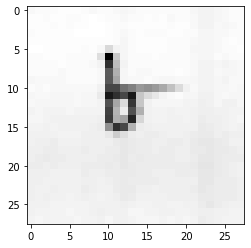

In [ ]:
#plotting image
show_img = fullDataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

### Setting-1  : 

- **totaldata:** 54908
- **minibatch:** 100
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{54908}{100} = 5.46 $
- **Learning rate:** 0.001
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 100
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

### Designing the Model using class

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

###Constructing loss and optimizer (select from PyTorch API)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training: forward, loss, backward, step

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2854745388031006. Accuracy: 10.872336550719359
Iteration: 1000. Loss: 2.308067798614502. Accuracy: 11.364050264068476
Iteration: 1500. Loss: 2.2902913093566895. Accuracy: 14.114004735020943
Iteration: 2000. Loss: 2.267343521118164. Accuracy: 17.35567291932253
Iteration: 2500. Loss: 2.26206111907959. Accuracy: 20.324166818430157


[2.2854745388031006, 2.308067798614502, 2.2902913093566895, 2.267343521118164, 2.26206111907959]


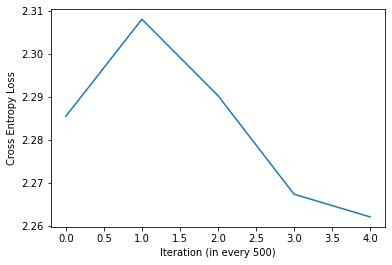

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-2  : 

- **totaldata:** 54908
- **minibatch:** 64
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{54908}{64} = 3.49 $
- **Learning rate:** 0.002
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 64
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.270554780960083. Accuracy: 12.201784738663267
Iteration: 1000. Loss: 2.2839810848236084. Accuracy: 18.685121107266436
Iteration: 1500. Loss: 2.2621381282806396. Accuracy: 23.675104716809326
Iteration: 2000. Loss: 2.2349977493286133. Accuracy: 25.53268985612821


[2.270554780960083, 2.2839810848236084, 2.2621381282806396, 2.2349977493286133]


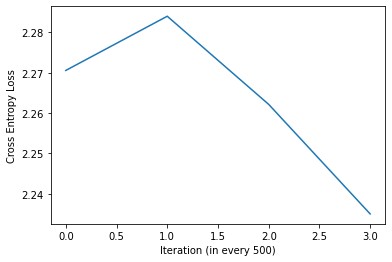

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-3  : 

- **totaldata:** 54908
- **minibatch:** 50
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{54908}{50} = 2.73 $
- **Learning rate:** 0.002
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 50
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2854220867156982. Accuracy: 14.696776543434712
Iteration: 1000. Loss: 2.2641379833221436. Accuracy: 17.027863777089784
Iteration: 1500. Loss: 2.2217295169830322. Accuracy: 25.277727189947186
Iteration: 2000. Loss: 2.227567195892334. Accuracy: 21.87215443452923
Iteration: 2500. Loss: 2.234297513961792. Accuracy: 30.340557275541794


[2.2854220867156982, 2.2641379833221436, 2.2217295169830322, 2.227567195892334, 2.234297513961792]


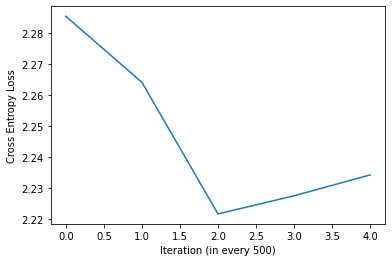

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-4  : 

- **totaldata:** 54908
- **minibatch:** 256
- **iterations:** 4,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 4000 \div \frac{54908}{256} = 18.64 $
- **Learning rate:** 0.002
- **Optimizer:** SGD

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2952749729156494. Accuracy: 15.261336732835549
Iteration: 1000. Loss: 2.262498617172241. Accuracy: 21.2529593880896
Iteration: 1500. Loss: 2.2400166988372803. Accuracy: 28.173374613003094
Iteration: 2000. Loss: 2.227933645248413. Accuracy: 28.319067565106536
Iteration: 2500. Loss: 2.2162632942199707. Accuracy: 32.56237479511928
Iteration: 3000. Loss: 2.1985559463500977. Accuracy: 33.45474412675287
Iteration: 3500. Loss: 2.1945674419403076. Accuracy: 28.246221089054817


[2.2952749729156494, 2.262498617172241, 2.2400166988372803, 2.227933645248413, 2.2162632942199707, 2.1985559463500977, 2.1945674419403076]


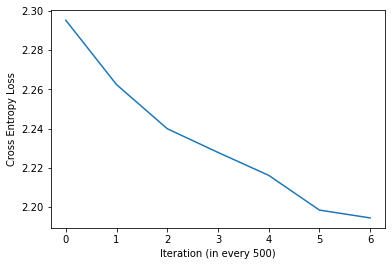

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Setting-5  : 

- **totaldata:** 54908
- **minibatch:** 256
- **iterations:** 4,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 4000 \div \frac{54908}{256} = 18.64 $
- **Learning rate:** 0.005
- **Optimizer:** Adamax

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.005

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9942716360092163. Accuracy: 32.52595155709343
Iteration: 1000. Loss: 1.978162407875061. Accuracy: 36.51429612092515
Iteration: 1500. Loss: 1.8997671604156494. Accuracy: 38.73611364050264
Iteration: 2000. Loss: 1.7617307901382446. Accuracy: 43.72609725004553
Iteration: 2500. Loss: 1.907409429550171. Accuracy: 43.01584410854125
Iteration: 3000. Loss: 1.7346657514572144. Accuracy: 44.43635039154981
Iteration: 3500. Loss: 1.8328251838684082. Accuracy: 44.41813877253688


[1.9942716360092163, 1.978162407875061, 1.8997671604156494, 1.7617307901382446, 1.907409429550171, 1.7346657514572144, 1.8328251838684082]


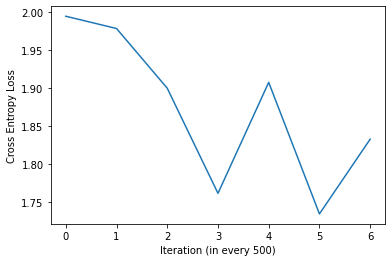

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()